In [13]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
t_df = pd.DataFrame()
for fl in os.listdir("./../../data/9_c_detrend/pct"):
    df = pd.read_csv(f"./../../data/9_c_detrend/pct/{fl}", index_col=0)
    if fl not in ["INF.csv", "PR.csv"]:
        df = df.rename(columns={f"{df.columns[0]}":fl[:-4]})
        if t_df.empty:
            t_df = df
        else:
            t_df = t_df.join(df)
    else:
        t_df[fl[:-4]] = df[fl[:-4]]

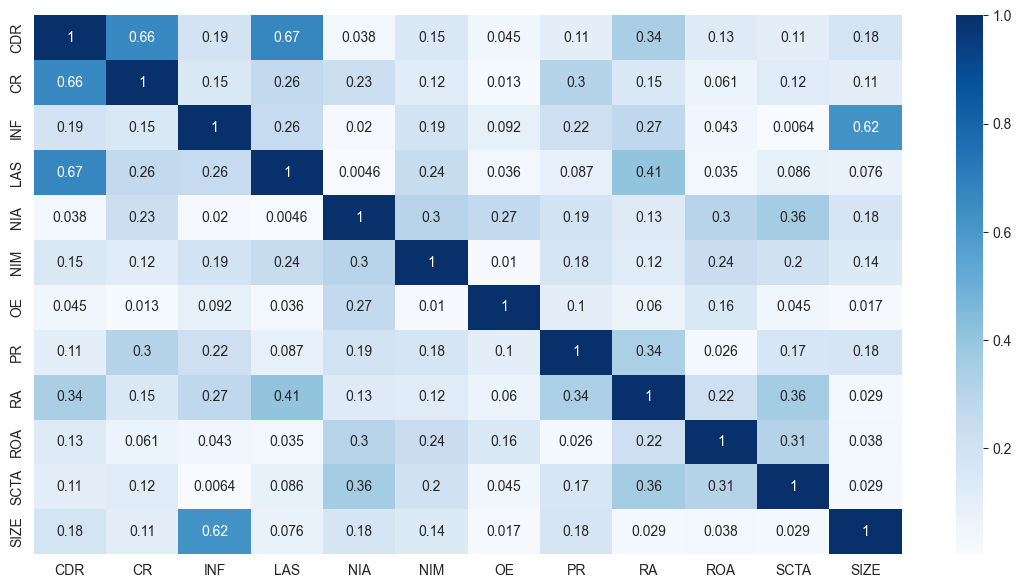

In [15]:
corr_matrix = abs(t_df.corr())
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.show()